In [1]:
import shutil
shutil.copy("../data/processed/employee_salary_final.csv", 
            "../data/processed/employee_salary_final_backup.csv")


'../data/processed/employee_salary_final_backup.csv'

In [2]:
# 1. Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# 2. Load raw
raw_path = "../data/raw/adult 3.csv"
df = pd.read_csv(raw_path)
df.head()



,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# 3. Quick EDA
df.info()
df.isnull().sum()
(df == " ?").sum()        # check "?" placeholders


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
# 4. Cleaning
df.replace(" ?", pd.NA, inplace=True)
df.dropna(inplace=True)
df = df[df["age"].between(18, 70)]
columns_to_keep = [
    "age", "workclass", "educational-num",
    "occupation", "hours-per-week",
    "capital-gain", "capital-loss", "income"
]
df = df[columns_to_keep]


In [6]:
# 5. Save
clean_path = "../data/processed/employee_salary_final.csv"
df.to_csv(clean_path, index=False)
print(f"✅ Saved cleaned file to {clean_path}")


✅ Saved cleaned file to ../data/processed/employee_salary_final.csv


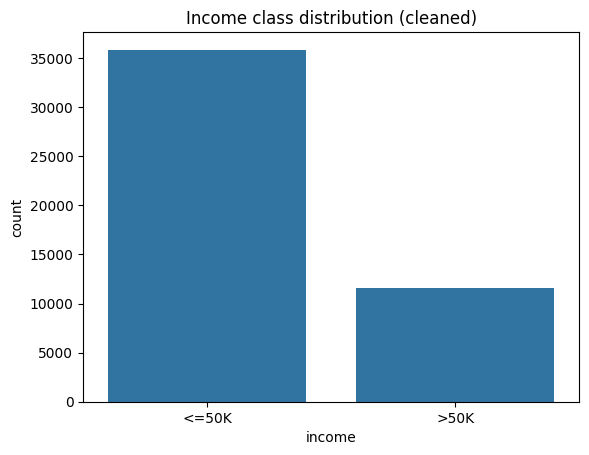

In [7]:
# 6. Check class balance
sns.countplot(x="income", data=df)
plt.title("Income class distribution (cleaned)")
plt.show()
